In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn 
# 设置超参数  
# batch_size 表示每次训练迭代中使用的样本数量  
batch_size = 100    
# 定义一个用于数据预处理的组合  
# 将图像数据转换为张量，并对其进行归一化处理  
transform = transforms.Compose([  
    # 将PIL Image或numpy.ndarray转换为torch.Tensor，并缩放到[0.0, 1.0]的范围内  
    transforms.ToTensor(),  
    # 对Tensor图像进行标准化处理  
    # 均值(R, G, B)为(0.5, 0.5, 0.5)，标准差(R, G, B)也为(0.5, 0.5, 0.5)  
    # 标准化后的图像范围将大致在[-1, 1]之间  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])    
# 加载训练数据集CIFAR10  
# root 指定数据集存放的根目录  
# train=True 表示加载训练集  
# transform 应用上面定义的预处理步骤  
# download=True 如果数据集不存在，则自动从互联网下载  
trainset = datasets.CIFAR10(root='./data/',  
                            train=True,  
                            transform=transform,  
                            download=True)    
# 加载测试数据集CIFAR10  
# train=False 表示加载测试集  
# 其他参数与训练集相同  
testset = datasets.CIFAR10(root='./data/',  
                           train=False,  
                           transform=transform)  
# 使用DataLoader来加载训练数据集  
# batch_size 指定每个batch的大小  
# shuffle=True 表示在训练过程中，每个epoch的数据会被随机打乱  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)    
# 使用DataLoader来加载测试数据集  
# 注意：这里代码重复了，实际只需一行即可  
# 在测试过程中，我们不需要打乱数据，因此 shuffle=False  
# 但由于代码重复，下面的这行代码会覆盖上面的testloader  
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)  
# 这行代码是多余的，应该删除  
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified


训练集中的图片：


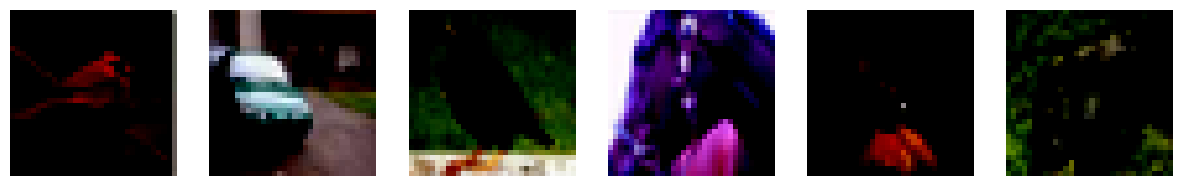

In [3]:
import matplotlib.pyplot as plt  
import numpy as np  
  
# 定义一个函数，用于从数据加载器中展示图片  
def show_images(loader, num_images=6):  
    # 从数据加载器中获取一批图像和对应的标签  
    # 注意：这里只获取了图像，因为标签（_）在当前函数中没有使用  
    images, _ = next(iter(loader))  
      
    # 确保图像数据在 [0, 1] 范围内  
    # 因为在数据预处理时，图像数据可能经过了标准化处理，这里将其转换回原始范围  
    images = images.clamp(0, 1)  
      
    # 使用matplotlib创建一个图形窗口，并指定子图（axes）的个数和大小  
    # 这里创建一个1行num_images列的子图网格，图形窗口的大小为15x5英寸  
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  
      
    # 遍历num_images个图像  
    for i in range(num_images):  
        # 取出第i个图像，并对其进行处理以适配matplotlib的imshow函数  
        # 首先，对图像张量进行permute操作，将其从(C, H, W)格式转换为(H, W, C)格式  
        # 然后，使用.cpu()将图像从GPU移动到CPU（如果图像在GPU上）  
        # 最后，使用.numpy()将PyTorch张量转换为NumPy数组  
        img = images[i].permute(1, 2, 0).cpu().numpy()  
          
        # 使用matplotlib的子图对象来显示图像  
        # imgshow函数默认图像数据在[0, 1]范围内，所以不需要额外处理  
        axes[i].imshow(img)  
          
        # 关闭坐标轴显示  
        axes[i].axis('off')   
      
    # 显示图形窗口  
    plt.show()  
  
# 显示训练数据集中的图片  
print("训练集中的图片：")  
# 调用show_images函数，传入训练数据加载器trainloader  
show_images(trainloader)

In [4]:
#超参数
learning_rate = 0.01
momentum = 0.9
epoch_num = 50
class LeNet5WithVGGFeatures(nn.Module):  
    def __init__(self):  
        super(LeNet5WithVGGFeatures, self).__init__()  
  
        # 初始化第一个卷积层序列  
        # 卷积层1  
        self.conv1 = nn.Sequential(  
            # 第一个卷积层，输入通道数为3（RGB），输出通道数为6，卷积核大小为3x3，步长为1，不使用填充  
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0),  
            # 使用ReLU激活函数  
            nn.ReLU(),  
            # 最大池化层，池化核大小为2x2，步长为2，不使用填充  
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),  
            # 批量归一化层，用于归一化特征图的每个通道  
            nn.BatchNorm2d(6)  # 修正批量归一化层的num_features参数为6  
        )  
  
        # 初始化第二个卷积层序列  
        # 卷积层2  
        self.conv2 = nn.Sequential(  
            # 第二个卷积层，输入通道数为6（来自上一个卷积层），输出通道数为16，卷积核大小为3x3，步长为1，不使用填充  
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0),  
            # 使用ReLU激活函数  
            nn.ReLU(),  
            # 最大池化层，池化核大小为2x2，步长为2，不使用填充  
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),  
            # 批量归一化层，用于归一化特征图的每个通道  
            nn.BatchNorm2d(16)  
        )  
  
        # 初始化全连接层序列  
        # 三个全连接层  
        # 注意：这里的维度计算假设在conv2层后，特征图的空间尺寸被缩小为6x6  
        self.fc = nn.Sequential(  
            # 第一个全连接层，输入特征数为16*6*6（来自conv2层），输出特征数为120  
            nn.Linear(16*6*6, 120),  # 确保这里的维度计算是正确的  
            # 使用ReLU激活函数  
            nn.ReLU(),  
            # 批量归一化层，用于归一化全连接层的输出  
            nn.BatchNorm1d(120),  # 添加批量归一化  
            # 第二个全连接层，输入特征数为120，输出特征数为84  
            nn.Linear(120, 84),  
            # 使用ReLU激活函数  
            nn.ReLU(),  
            # 批量归一化层，用于归一化全连接层的输出  
            nn.BatchNorm1d(84),  # 添加批量归一化  
            # 第三个全连接层（通常是输出层），输入特征数为84，输出特征数为10（假设有10个类别）  
            nn.Linear(84, 10),  
        )  
  
    # 定义前向传播过程  
    def forward(self, x):  
        # 通过第一个卷积层序列  
        x = self.conv1(x)  
        # 通过第二个卷积层序列  
        x = self.conv2(x)  
        # 展平多维tensor，将其转换为一维向量，以输入到全连接层  
        x = x.view(x.size(0), -1)  
        # 通过全连接层序列  
        x = self.fc(x)  
        # 返回网络的输出  
        return x
# 创建模型，若cuda可用，则使用cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5WithVGGFeatures()
model.to(device)

# 打印模型信息
print(model)

# 使用交叉熵损失函数
criterion = nn.CrossEntropyLoss() 
# 使用SGD优化，学习率为0.01，动量为0.9
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

LeNet5WithVGGFeatures(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Sequential(
    (0): Linear(in_features=576, out_features=120, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [6]:
# 训练模型  
import os  
# Variable 类在 PyTorch 0.4.0 之后的版本已经不再使用，取而代之的是直接在 tensor 上调用 requires_grad=True。但此处代码可能是为了兼容旧版本的 PyTorch  
from torch.autograd import Variable    
# 设置环境变量，防止在某些情况下由于 OpenMP 引起的内存占用问题  
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"    
# 初始化用于记录损失和准确率的列表  
plotloss = [] # 损失数组  
plotacc = [] # 准确率数组    
# 假设 epoch_num 和 trainloader、model、optimizer、criterion 已经在之前的代码中被定义  
# epoch_num 表示训练迭代次数  
# trainloader 是 DataLoader，用于加载训练数据  
# model 是你要训练的神经网络模型  
# optimizer 是优化器，例如 SGD, Adam 等  
# criterion 是损失函数，例如交叉熵损失函数    
for epoch in range(epoch_num):  # 遍历每个训练周期  
    model.train()  # 设置模型为训练模式（启用 dropout, batchnorm 等）  
    sum_loss = 0.0  # 初始化损失总和  
    correct = 0.0  # 初始化正确分类的样本数  
    total = 0.0  # 初始化总的样本数        
    # 在训练集上进行训练  
    for (i, data) in enumerate(trainloader):  
        images, labels = data  # 解包数据和标签   
        # 如果支持 CUDA，则将数据和标签移动到 GPU 上  
        if torch.cuda.is_available():  
            images = Variable(images).cuda()  # 注意：在 PyTorch 0.4.0 之后，应直接使用 images.to(device)  
            labels = Variable(labels).cuda()  # 同样，应直接使用 labels.to(device)  
        else:  
            images = Variable(images)  # 如果不支持 CUDA，则直接在 CPU 上处理  
            labels = Variable(labels)            
        # 清零之前批次计算的梯度  
        optimizer.zero_grad()             
        # 将当前批次的数据输入模型  
        outputs = model(images)             
        # 计算损失  
        loss = criterion(outputs, labels)             
        # 反向传播损失，计算梯度  
        loss.backward()             
        # 使用优化器更新模型参数  
        optimizer.step()             
        # 统计本批次训练数据的损失和准确率  
        sum_loss += loss.item()  
        _, predicted = torch.max(outputs.data, 1)  # 获取预测类别  
        total += labels.size(0)  # 更新总的样本数  
        correct += (predicted == labels).sum().item()  # 更新正确分类的样本数    
        # 每500个批次输出一次训练信息  
        if (i+1) % 500 == 0:  
            print('[epoch:%d, iter:%d] Loss: %.03f | Acc: %.3f%% '   
                  % (epoch + 1, (i + 1 + epoch * len(trainloader)), sum_loss / (i + 1), 100. * correct / total))  
            plotloss.append(sum_loss / (i + 1))  # 记录损失值  
            plotacc.append(100. * correct / total)  # 记录准确率

[epoch:1, iter:500] Loss: 1.394 | Acc: 49.872% 
[epoch:2, iter:1000] Loss: 1.096 | Acc: 61.176% 
[epoch:3, iter:1500] Loss: 0.969 | Acc: 65.688% 
[epoch:4, iter:2000] Loss: 0.887 | Acc: 68.576% 
[epoch:5, iter:2500] Loss: 0.816 | Acc: 70.946% 
[epoch:6, iter:3000] Loss: 0.755 | Acc: 73.262% 
[epoch:7, iter:3500] Loss: 0.709 | Acc: 74.884% 
[epoch:8, iter:4000] Loss: 0.663 | Acc: 76.592% 
[epoch:9, iter:4500] Loss: 0.623 | Acc: 77.902% 
[epoch:10, iter:5000] Loss: 0.590 | Acc: 78.968% 
[epoch:11, iter:5500] Loss: 0.546 | Acc: 80.636% 
[epoch:12, iter:6000] Loss: 0.526 | Acc: 81.364% 
[epoch:13, iter:6500] Loss: 0.493 | Acc: 82.336% 
[epoch:14, iter:7000] Loss: 0.464 | Acc: 83.352% 
[epoch:15, iter:7500] Loss: 0.440 | Acc: 84.162% 
[epoch:16, iter:8000] Loss: 0.417 | Acc: 85.162% 
[epoch:17, iter:8500] Loss: 0.395 | Acc: 85.832% 
[epoch:18, iter:9000] Loss: 0.384 | Acc: 86.298% 
[epoch:19, iter:9500] Loss: 0.360 | Acc: 86.882% 
[epoch:20, iter:10000] Loss: 0.346 | Acc: 87.564% 
[epoch:21

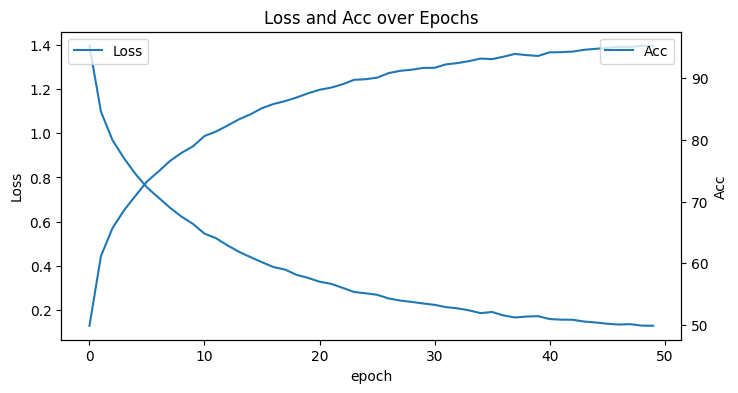

In [7]:
# 定义画板，添加一个子图
fig, ax1 = plt.subplots(figsize=(8, 4))

# 绘制损失曲线，使用ax1的y轴
ax1.plot(plotloss, label='Loss')
ax1.set_xlabel('epoch')  # 设置x轴标签
ax1.set_ylabel('Loss')   # 设置y轴标签
ax1.tick_params(axis='y')

# 创建第二个y轴，共享同一个x轴
ax2 = ax1.twinx()

# 绘制准确率曲线，使用ax2的y轴
ax2.plot(plotacc, label='Acc')
ax2.set_ylabel('Acc')  # 设置y轴标签
ax2.tick_params(axis='y')
# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# 设置标题
plt.title('Loss and Acc over Epochs')
# 显示图表
plt.show()

In [9]:
# 定义两个列表，用于存储每个类别中测试正确的样本个数和总样本个数，但这里使用浮点数是不必要的，通常使用整数  
class_correct = list(0. for i in range(10))  # 初始化为0的浮点数列表，但通常使用整数列表  
class_total = list(0. for i in range(10))    # 初始化为0的浮点数列表，但通常使用整数列表  
  
# 将模型设置为评估模式，关闭Dropout等层的训练时行为  
model.eval()   
  
# 在测试集上进行测试  
for data in testloader:  # 遍历测试数据加载器中的每个批次  
    images, labels = data  # 获取图像数据和对应的标签  
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

   # 在测试循环中
    images = images.to(device)
    labels = labels.to(device)
    # 将当前批次的数据输入模型，得到预测结果  
    outputs = model(images)    
      
    # 获取预测结果中最大值的索引，即预测的类别  
    _, predicted = torch.max(outputs.data, 1)  # 注意：.data属性在PyTorch较新版本中可能已被弃用  
      
    # 比较预测结果和真实标签，生成布尔张量，表示预测是否正确  
    c = (predicted == labels).squeeze()  # 去除可能的多余维度  
      
    # 这里存在逻辑错误：下面的循环试图迭代整个批次的样本，但实际上应该迭代每个样本的预测和标签  
    # 注意：这个循环是错误的，因为它试图直接通过索引访问labels和c，但它们是批次张量  
    for i in range(10):  # 这里的10应该是批次大小，但实际上不总是10  
        label = labels[i]  # 这只会取到每个批次的第一个样本的标签  
        class_correct[label] += c[i]  # 这只会更新第一个样本的类别统计  
        class_total[label] += 1  # 同上  
  
# 图片类别名称  
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  
  
# 输出测试结果（测试集中每类图片的识别准确率），但由于上面的循环逻辑错误，结果可能不准确  
for i in range(10):  
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))  # 注意：如果class_total[i]为0，会抛出除零错误

Accuracy of plane : 66 %
Accuracy of   car : 71 %
Accuracy of  bird : 68 %
Accuracy of   cat : 48 %
Accuracy of  deer : 59 %
Accuracy of   dog : 42 %
Accuracy of  frog : 74 %
Accuracy of horse : 67 %
Accuracy of  ship : 79 %
Accuracy of truck : 69 %


In [11]:
# 确保模型保存的目录存在，如果不存在则创建
if not os.path.exists('./model'):
    os.makedirs("./model")  # 使用os.makedirs可以递归创建多级目录
# 保存模型全部信息
torch.save(model, './model/cifar10_model.pkl')

In [12]:
import torch.nn.functional as F
import numpy as np
from PIL import Image
from torchvision import datasets, transforms

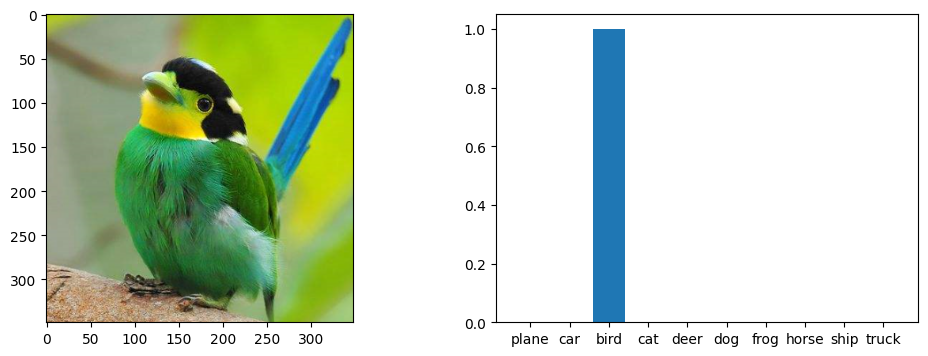

类别 2
分类 bird


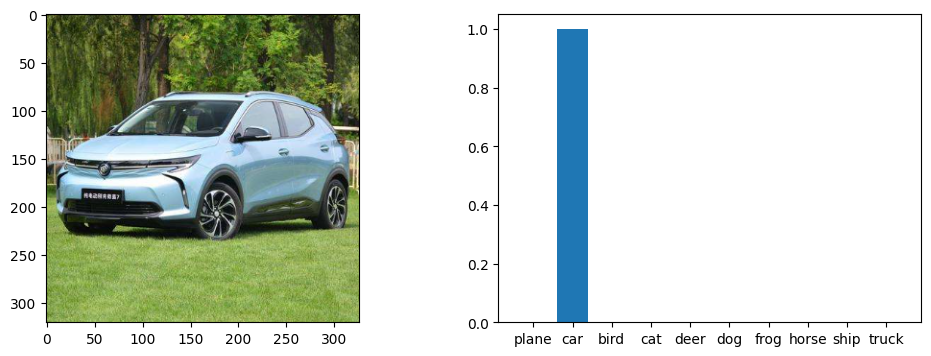

类别 1
分类 car


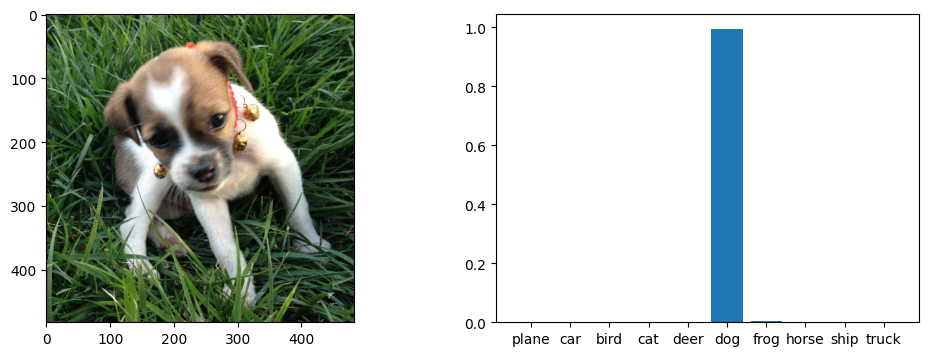

类别 5
分类 dog


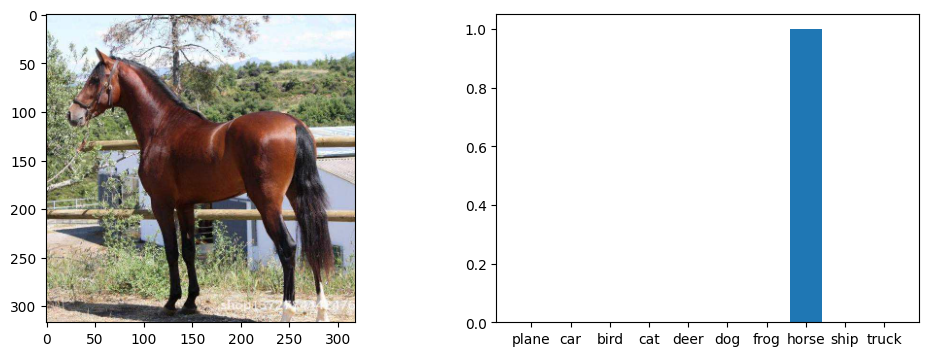

类别 7
分类 horse


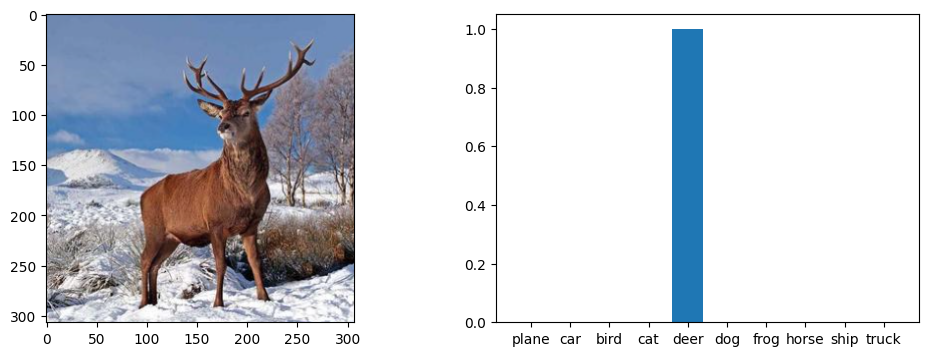

类别 4
分类 deer


In [15]:
# 类别名称
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 使用保存的模型创建模型对象
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5WithVGGFeatures()
model = model.to(device)
model = torch.load('./model/cifar10_model.pkl')  # 加载模型文件

model.eval()  # 把模型转为test模式

for ind in [1, 2, 4, 5, 6]:
    # 读取并显示要预测的图片
    pic = f"./test_pic/{ind}.png"
    img = Image.open(pic).convert('RGB') # 读取图像
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    
    # 预处理转换（包括缩放大小、转为Tensor及标准化归一化三个步骤）
    trans = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                     std=(0.5, 0.5, 0.5)),
                               ])
    img = trans(img)
    img = img.to(device)
    # 图片扩展，增加一维，模型要求4维：[batch_size,通道,长，宽]，普通图片只有三维：[通道,长，宽]
    img = img.unsqueeze(0) 
    
    # 将数据输入模型
    output = model(img)
    
    # 获得分类概率
    prob = F.softmax(output, dim=1) #prob是10个分类的概率
    
    # 画出分类概率柱图
    plt.subplot(1, 2, 2)
    plt.bar(classes, prob[0].cpu().detach().numpy())
    plt.show()
    
    # 输出识别结果
    value, predicted = torch.max(output.data, 1)
    print("类别", predicted.item())
    print("分类", classes[predicted.item()])